# Metody Obliczeniowe w Nauce i Technice
## Laboratorium 11
### Generatory Liczb Losowych
#### Mateusz Surjak

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import shapiro
import scipy.special as special

## Testowanie generatorów liczb losowych

In [2]:
def draw_plots(n):
    # generowanie n liczb generatorem PCG64
    x = np.random.default_rng().random(n)
    # generowanmie n liczb generatorem Marsenne Twister
    rnd = [random.random() for _ in range(n)]
    
    # Histogram
    plt.hist(x,bins=10)
    plt.title("Dla generatora PCG64")
    plt.show()
    plt.title("Dla generatora Mersenne Twister")
    plt.hist(rnd,bins=10)
    plt.show()
    
    # Liczenie ile liczb spełnia nierówność x_i < x_(i+1)
    np_counter = 0
    rnd_counter = 0
    
    for i in range(0,n-1):
        if x[i] < x[i+1]:
            np_counter += 1
        if rnd[i] < rnd[i+1]:
            rnd_counter += 1
    
    print(f"Nierówność dla generatora PCG64: {np_counter}")
    print(f"Nierówność dla generatora Mersennd Twister: {rnd_counter}")


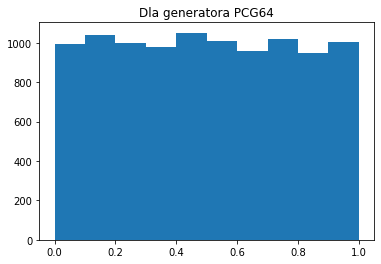

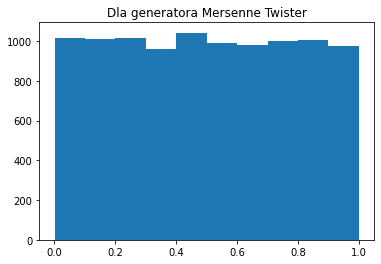

Nierówność dla generatora PCG64: 4972
Nierówność dla generatora Mersennd Twister: 5017


In [3]:
draw_plots(10000)

Myślę że dla idealnego generatora powinno być dokładnie n/2 takich liczb (gdzie n to długośc listy liczb wylosowanych). Wyniki otrzymane przeze mnie są bardzo bliskie ideałowi.

####  Frequency (Monobit) Test 
Test 2.1 ---> https://nvlpubs.nist.gov/nistpubs/Legacy/SP/nistspecialpublication800-22r1a.pdf

Test w artykule był przeprowadzany na słowach nad alfabetem {1,0}. Ja przyjąłem że liczby losowe mniejsze bądź równe od 0.5 będą ewaluowały się do 0, a większe do 1

Test sprawdza czy sekwencja liczb może być sekwencją losową.

In [4]:
def test(xx):
    n = len(xx)
    S = 0
    
    for x in xx:
        if x > 1/2:
            S += 1
        else:
            S -= 1
    
    S_obs = abs(S)/np.sqrt(n)
    val = special.erfc(S_obs/np.sqrt(2))
    
    if val < 0.1:
        #Sequence is not random
        return 0
    else:
        #Sequence is random
        return 1

In [5]:
def test_test():
    for n in range(10,10020,1000):
        pcg = 0
        twi = 0
        
        for i in range(20):
            xx = np.random.default_rng().random(n)
            rnd = [random.random() for _ in range(n)]
            pcg += test(xx)
            twi += test(rnd)
        
        print(f"""
        PCG jest randomowe {pcg} na 20 razy dla n={n}
        Mersanne Twister jest randomowe {twi} na 20 razy dla n={n}
        """)

In [6]:
test_test()


        PCG jest randomowe 19 na 20 razy dla n=10
        Mersanne Twister jest randomowe 16 na 20 razy dla n=10
        

        PCG jest randomowe 20 na 20 razy dla n=1010
        Mersanne Twister jest randomowe 20 na 20 razy dla n=1010
        

        PCG jest randomowe 18 na 20 razy dla n=2010
        Mersanne Twister jest randomowe 19 na 20 razy dla n=2010
        

        PCG jest randomowe 19 na 20 razy dla n=3010
        Mersanne Twister jest randomowe 18 na 20 razy dla n=3010
        

        PCG jest randomowe 18 na 20 razy dla n=4010
        Mersanne Twister jest randomowe 18 na 20 razy dla n=4010
        

        PCG jest randomowe 18 na 20 razy dla n=5010
        Mersanne Twister jest randomowe 19 na 20 razy dla n=5010
        

        PCG jest randomowe 18 na 20 razy dla n=6010
        Mersanne Twister jest randomowe 18 na 20 razy dla n=6010
        

        PCG jest randomowe 18 na 20 razy dla n=7010
        Mersanne Twister jest randomowe 20 na 20 razy dla n=70

### Wnioski:
- Nie zauważyłem praktycznie żadnej różnicy pomiędzy generatorami
- Z rosnącym N praktycznie nic się nie zmienia, jedynie próbka badawcza jest większa co pozwala na bardziej godne zaufania wyniki testu.

# Generowanie liczb z rozkładu normalnego

In [7]:
import math
#generowanie liczb zgodnych z rozkładem normalnym
def rand_num(EX,st):
    u_1 = random.random()
    u_2 = random.random()
    
    fi = 2 * np.pi * u_2
    R2 = -2 * math.log(u_1) 
    
    Z1 = math.sqrt(R2) * math.cos(fi)
    Z2 = math.sqrt(R2) * math.sin(fi)

    return Z1*st + EX,Z2*st+EX

#rysowanie histogramy oraz wykresu gęstości
def generate_plot(N,EX,st):
    hist = []
    
    for i in range(N):
        z1,z2 = rand_num(EX,st)
        hist.append(z1)
        hist.append(z2)
    
    plt.hist(hist,bins=10)
    
    ges = []
    # generowanie wartości dla gęstości rozkłądu normalnego.
    for h in hist:
        ges.append((1/(st*np.sqrt(2*np.pi)))*np.exp(-((h-EX)**2)/(2*st**2)))
    
    plt.plot(hist,ges,'ro')
    plt.show()
    plt.plot(hist,ges,'ro')
    plt.show()
    
    return shapiro(hist)

def test_normal(alpha):
    # wartosc oczekiwana
    EX = 0
    # odchylenie standardowe
    st = 2.5
    
    test_stat, p_value = generate_plot(1000, EX, st)
    print(f"P-value: {p_value}")
    
    if p_value > alpha:
        print("Liczby mogą pochodzić z rozkładu normalnego")
    else:
        print("Liczby raczej nie pochodzą z rozkładu normalnego")

    


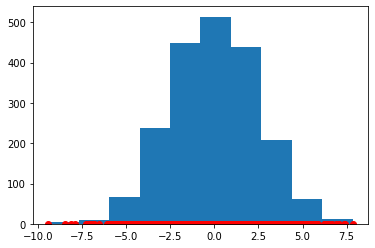

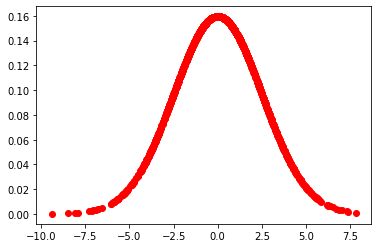

P-value: 0.7774421572685242
Liczby mogą pochodzić z rozkładu normalnego


In [8]:
test_normal(0.05)

Gęstość na wykresie pierwszym jest bardzo blisko osi x-owej, wynika to z skali przyjętej na osi y-kowej, prezentuję sam wykres gęstości na wykresie drugim.

# Monte Carlo

Pole kradratu opisanego na kole o promieniu 1 wynosi 4. Skoro promień koła ma długość 1 to wraz ze wzorem P = $\pi r^2$, dla r = 1 => P = $\pi$. Czyli musimy wyliczyć pole koła znając pole kwadratu opisanego na kole. Pole koła będzie równe stosunkowi punktów leżących w kole do wszystkich punktów jakie braliśmy pod uwagę, pomnożone przez pole kwadratu. Wartość $\pi$ będzie najdokładniejsza dla coraz większej liczby punktów. Wynik zależy tez od generatora liczb losowych.

In [9]:
def monte_carlo(n, show = True):
    x = np.random.uniform(-1,1,(n,2))
    inside_x = []
    inside_y = []
    
    for a in x:
        if np.sqrt(a[0]**2 + a[1]**2) < 1:
            inside_y.append(a[1])
            inside_x.append(a[0])
    # pole kwadratu opisanego na kole
    P = 4
    # ilość punktów w śwodku koła
    k = len(inside_x)
    pi = P* k/n
    
    if show:
        print(f"PI: {pi}")
        plt.figure(figsize=(10,10))
        plt.scatter(x[:,0],x[:,1],s=.3,c='red')
        plt.scatter(inside_x, inside_y,s=.3,c='blue')
        plt.show()
    
    return pi
    

PI: 3.1468


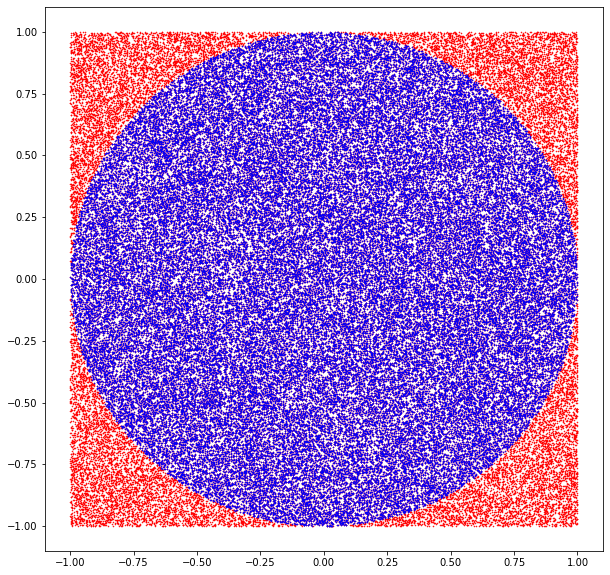

3.1468

In [10]:
monte_carlo(100000)

In [11]:
def absolute_error():
    err = []
    n = []
    
    for i in range(10,100011,5000):
        pi = monte_carlo(i,show=False)
        err.append(abs(np.pi - pi))
        n.append(i)
    
    plt.plot(n,err)
    plt.show()


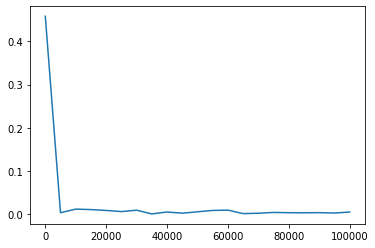

In [12]:
absolute_error()

## Wnioski:
- Wartość liczby $\pi$ zwracana z metody Monte Carlo jest bardzo bliska wartości rzeczywistej
- Błąd bezwględny maleje wyaz ze wzrostem liczby punktów, już na około 10 tysiącach punktów przybliżenie jest bardzo dobre.